# Non Normalized

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index.


Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [11]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import reader as _reader
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.decomposition import PCA
import numpy as np
import sklearn
from sklearn.cluster import KMeans

In [4]:
X = _reader.readBOW(normed=False)
pca = PCA(n_components = 0.85, svd_solver='full')
X = pca.fit_transform(X)
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
[[-1.25510702e-02  1.15997446e-02 -2.31226854e-02 ...  2.14556915e-02
  -2.59750033e-02 -2.14123217e-02]
 [-3.34102047e-02 -5.81803065e-03 -2.22994792e-04 ...  1.91174104e-02
   3.00254288e-02  1.29155646e-02]
 [-2.87159442e-02 -1.35651072e-02 -1.16084396e-02 ...  2.79748253e-02
   4.12682001e-02  6.06004260e-02]
 ...
 [-7.01907778e-02 -1.04455467e-02  8.09640663e-02 ...  2.44972243e-02
  -2.86677345e-02 -3.95388055e-02]
 [-2.21491258e-02 -2.90344811e-03 -7.79716419e-03 ... -1.00529422e-02
  -9.63731069e-06  1.21748375e-02]
 [-1.79830385e-02 -1.04658865e-02 -2.35115909e-02 ... -1.89249197e-02
   5.31081008e-04 -6.09971313e-03]]
(13229, 733)


In [5]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.8256479059766288
error = 0.8256479059766288
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.7875010673237776
error = 0.03814683865285129
###############################
Number of Clusters: 22
Starting K-means++
Finished
J = 0.7651175817368834
error = 0.02238348558689418
###############################
Number of Clusters: 32
Starting K-means++
Finished
J = 0.7410367872668802
error = 0.02408079447000322
###############################
Number of Clusters: 42
Starting K-means++
Finished
J = 0.7266156935808169
error = 0.014421093686063258
###############################
Number of Clusters: 52
Starting K-means++
Finished
J = 0.7118859309425245
error = 0.014729762638292399
###############################
Number of Clusters: 62
Starting K-means++
Finished
J = 0.7020715480440064
error = 0.009814382898518104
###############################

Best k: 62
Number of iterati

J  [0.8256479059766288, 0.7875010673237776, 0.7651175817368834, 0.7410367872668802, 0.7266156935808169, 0.7118859309425245, 0.7020715480440064]
Ks  [2, 12, 22, 32, 42, 52, 62]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

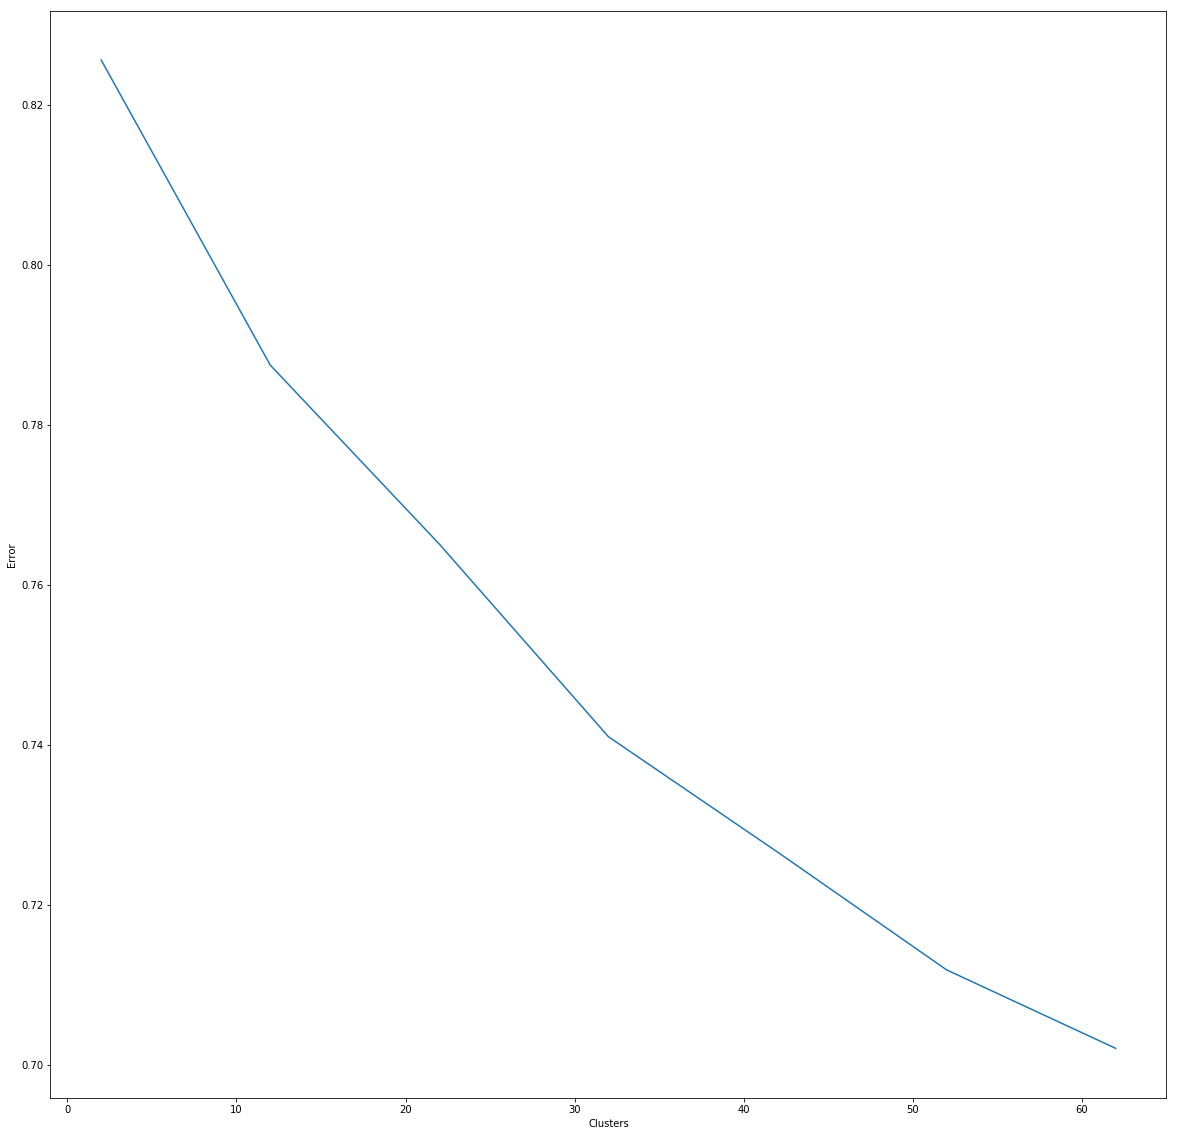

In [6]:
_visualization.plot_cluster_errors(Ks,Js)

## Refining the Search 
Acording with the graph the elbow forms after 70 clusters, then we can refine our search while reducing the step from 10 to 1 and the episilon to `10^-3`. 

In [7]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X, min_k=best_K-2, step=1, eps=0.001)

###############################
Number of Clusters: 60
Starting K-means++
Finished
J = 0.7043139417186938
error = 0.7043139417186938
###############################
Number of Clusters: 61
Starting K-means++
Finished
J = 0.7061409415744792
error = 0.0018269998557853828
###############################

Best k: 61
Number of iterations: 3


J  [0.7043139417186938, 0.7061409415744792]
Ks  [60, 61]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

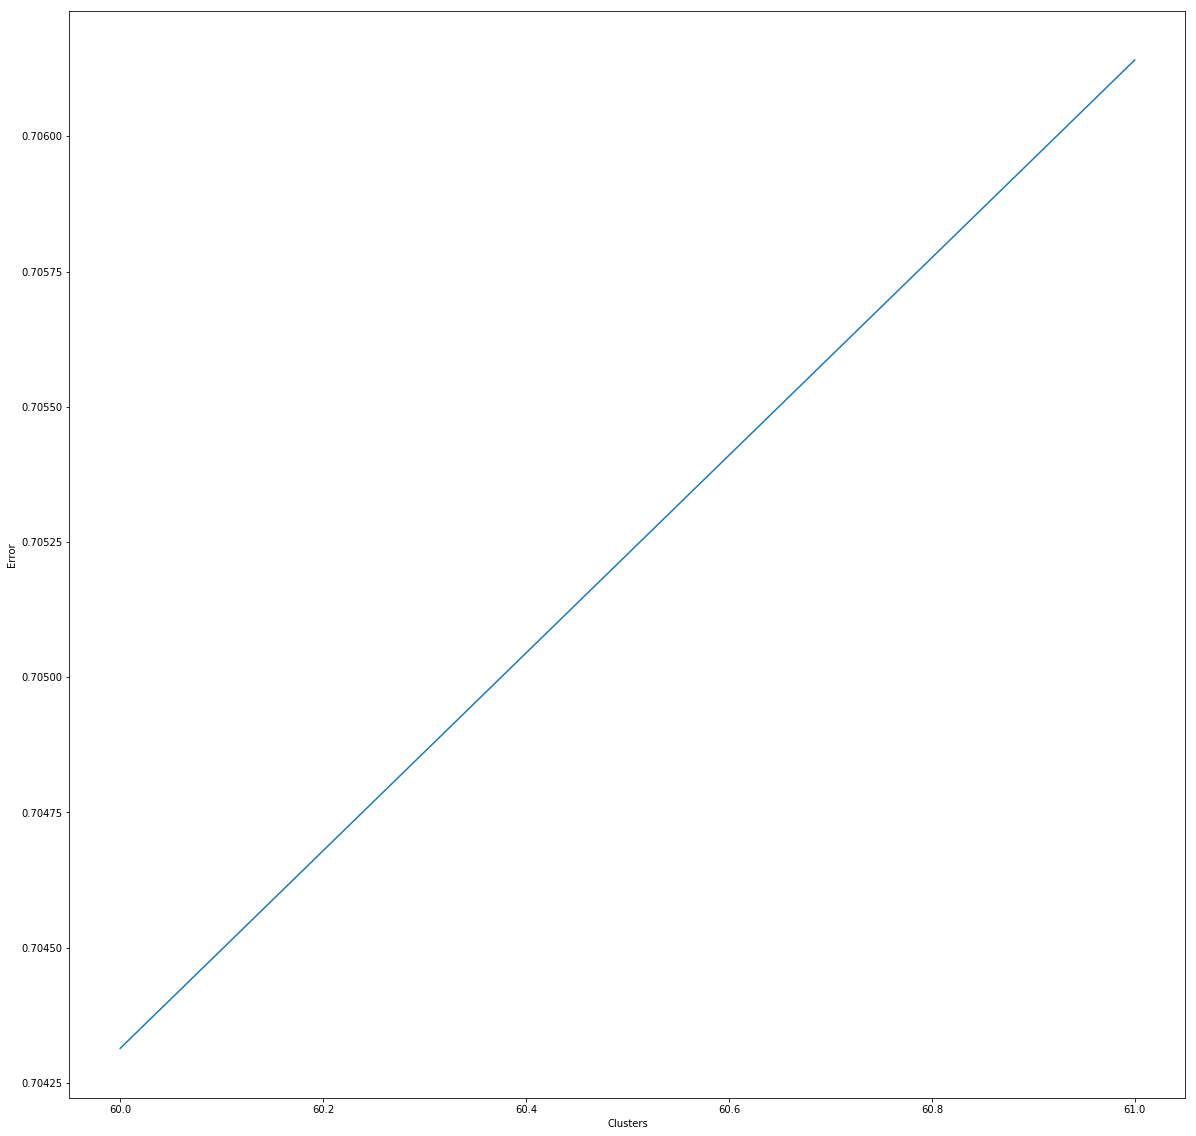

In [8]:
_visualization.plot_cluster_errors(Ks,Js)

In [12]:
cluster_k = KMeans(n_clusters=best_K,random_state=42,n_jobs=-1)
kmeans_BOW_non_norm = cluster_k.fit(X)
_metrics.applyAllMetrics(X,kmeans_BOW_non_norm.labels_)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Davies Bouldin
3.451147659823894

Calinski and Harabaz
39.68360989293879

Silhouette Score
0.04048258806721461

